# CaseStudy Notebook - Lending Case Study

## About Dataset

###  This Data Set Consists of data on loan application which needs to be analysed to identify defaulters 


In [4]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_data= pd.read_csv('loan.csv')

## 1.0 Prelimenary Data Analysis

In [8]:
print("Shape of Dataset: \n",df_data.shape)

Shape of Dataset: 
 (39717, 111)


### 1.1 Analysing data for duplicate columns


In [10]:
print(df_data.duplicated(subset=None,keep='first').count())

39717


##### <span style='color:RED'> Observation 1.1.1: Total unique records in the dataset are 39717 </span>

In [12]:
# The ID column is used for checking data duplication
duplicate_rows=df_data[df_data.duplicated(['id'])]
print("Duplicate rows :", duplicate_rows)

Duplicate rows : Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_

##### <span style='color:RED'> Observation 1.1.2: There are no duplicate records based on ID field </span>

### 1.2 Analysing Null Rows and Columns

In [15]:
# Check for records with all null fields
print('Number of rows having all null values:')
print(df_data.isnull().all(axis=1).sum())

Number of rows having all null values:
0


##### <span style='color:RED'>Observation 1.2.1: There are no rows with all NULL values</span>

In [17]:
# Determining the number of columns through sum function which have missing values
print('Number of columns having all null values:')
print(df_data.isnull().all(axis=0).sum())

Number of columns having all null values:
54


##### <span style='color:RED'>Observation 1.2.2: There are 54 columns with all NULL values</span>

In [19]:
# Print the columns with all null values. Check null and find the mean. If mean is 1 then all values in that column are null
all_null_cols = df_data.columns[df_data.isnull().mean()==1]
print(all_null_cols)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

## 1.3 Datacleansing 

#### Step1 - Drop columns with all null values

In [22]:
# Drop columns with all null values
print("Step1 - Shape Before Dropping: ",df_data.shape)
df_data.drop(all_null_cols,axis=1, inplace= True)
print("Step1 - Shape After Dropping: ",df_data.shape)

Step1 - Shape Before Dropping:  (39717, 111)
Step1 - Shape After Dropping:  (39717, 57)


##### <span style='color:RED'>Observation 1.3.1: There are 57 columns in the updated dataset which will be used for further analysis</span>

#### Step2 - Drop records with 'loan_status' == "Current" since these customers are not considered defaulters by the bank as per the given case study

In [25]:
df_data=df_data[~(df_data['loan_status']=="Current")]
df_data.shape

(38577, 57)

##### <span style='color:RED'>Observation 1.3.2: There are 38577 rows in the updated dataset which will be used for further</span>

In [27]:
#Check the datatypes of new dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  38577 no

#### Step3 - Drop column next_pymnt_d since all values are 0

In [29]:
# Drop column next_pymnt_d with all 0 values
print("Step3 - Shape Before Dropping next_pymnt_d: ",df_data.shape)
df_data.drop(['next_pymnt_d'],axis=1, inplace= True)
print("Step3 - Shape After Dropping next_pymnt_d: ",df_data.shape)

Step3 - Shape Before Dropping next_pymnt_d:  (38577, 57)
Step3 - Shape After Dropping next_pymnt_d:  (38577, 56)


In [30]:
df_data.shape

(38577, 56)

##### <span style='color:RED'>Observation 1.3.3: There are 56 columns in the updated dataset which will be used for further</span>


#### Step4 - Employment Length field needs clean-up since this would help in numerical analysis

In [33]:
print("Various data in emp_length",df_data['emp_length'].value_counts())

Various data in emp_length emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


In [34]:
# As per data dictonary <1 year would be considered as 0 and 10+ years would be considered as 10 Years
df_data.emp_length= df_data.emp_length.str.replace('< 1 year','0 year')
df_data.emp_length= df_data.emp_length.str.replace('10+ years','10 years')

In [35]:
print("Various data in emp_length after updates",df_data['emp_length'].value_counts())

Various data in emp_length after updates emp_length
10 years    8488
0 year      4508
2 years     4291
3 years     4012
4 years     3342
5 years     3194
1 year      3169
6 years     2168
7 years     1711
8 years     1435
9 years     1226
Name: count, dtype: int64


In [36]:
# Extract numeric data from string values
df_data['emp_length']=df_data.emp_length.str.extract(r'(\d+)')

In [37]:
print("Various data in emp_length of copy_data",df_data['emp_length'].value_counts())

Various data in emp_length of copy_data emp_length
10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64


In [38]:
# Check if shape has been altered
df_data.shape

(38577, 56)

In [39]:
df_data.emp_length.info()

<class 'pandas.core.series.Series'>
Index: 38577 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
37544 non-null  object
dtypes: object(1)
memory usage: 602.8+ KB


In [40]:
#Rows in emp_length not listed by value_counts
38577 - 37544 

1033

##### <span style='color:RED'>Observation 1.3.4: There are 1033 rows in emp_length which are not listed by value_counts. These would need separate handling.

#### Step 5 - Interest Rate field has % symbol which needs to be removed for analysis

In [43]:
#Clean interest rates
df_data['int_rate']=df_data['int_rate'].str.replace('%','')

In [44]:
df_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Step 6 - revol_util has % symbol and needs to be removed.

In [46]:
#Clean revol_util rates
df_data['revol_util']=df_data['revol_util'].str.replace('%','')

## 2.0 EDA

### 2.1 Analyze Key Elements

#### Following data elements will be considered for further analysis and are considered the key data elements to assess risk related to loan applications.<BR><BR> - Loan Amount <BR><BR>- Interest Rate <BR><BR>- DTI<BR> <BR>- Annual Income

In [50]:
# Make a copy of the cleansed data for further analysis
df_loan_data = df_data

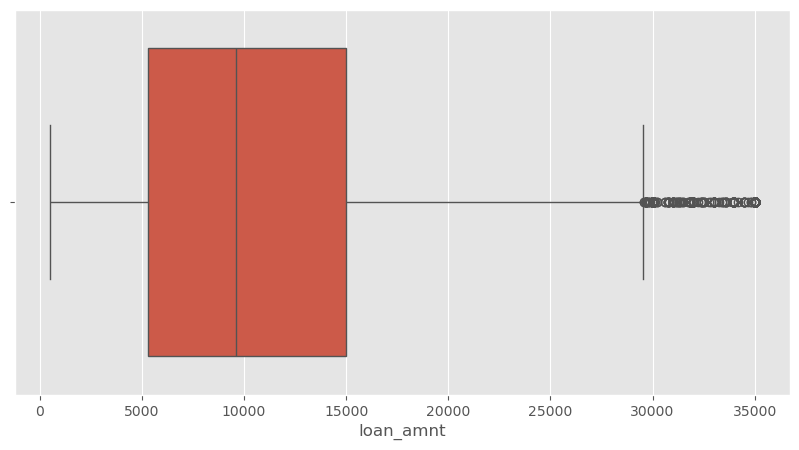

In [51]:
#Drawing Box Plot for loan amount
plt.figure(figsize=(10,5))
with plt.style.context('ggplot'):
  sns.boxplot(df_loan_data.loan_amnt,orient='h')

##### <span style='color:RED'>Observation 2.1.1: There is a continous distribution of data across loan amount and hence need not drop outliers. <BR> 95the percentile and below can be considered for analysis

In [53]:
# Convert int_rate to float for analysis
df_loan_data['int_rate'] = df_loan_data['int_rate'].astype('float64')

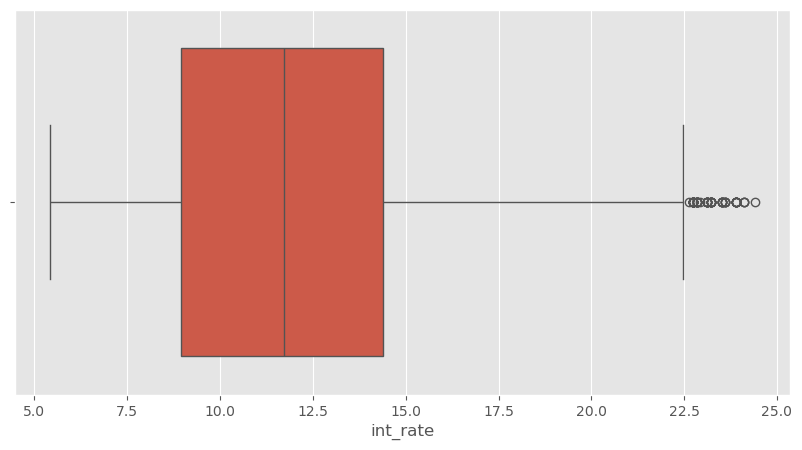

In [54]:
# Drawing Boxplot for Interest Rate
plt.figure(figsize=(10,5))
with plt.style.context('ggplot'):
  sns.boxplot(df_loan_data.int_rate,orient='h')

##### <span style='color:RED'>Observation 2.1.2: There is a continuous distribution of data across interest rate and hence need not drop outliers.

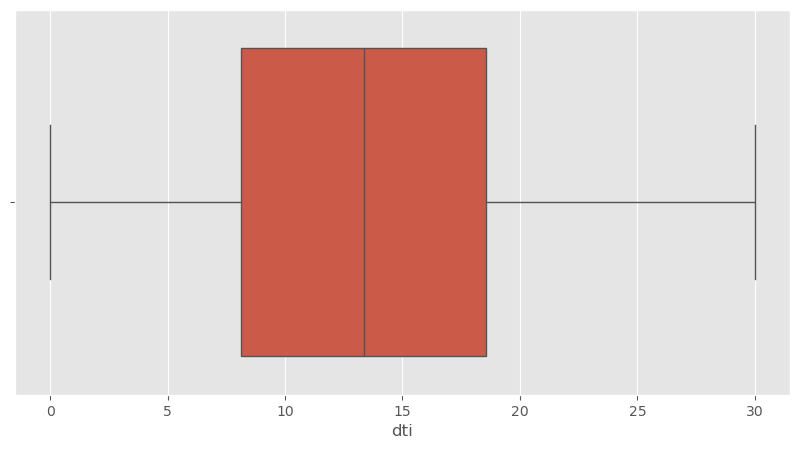

In [56]:
#DTI distribution
# Drawing Boxplot for DTI
plt.figure(figsize=(10,5))
with plt.style.context('ggplot'):
  sns.boxplot(df_loan_data.dti,orient='h') 

##### <span style='color:RED'>Observation 2.1.3: There are no outliers for DTI and hence need not drop any.

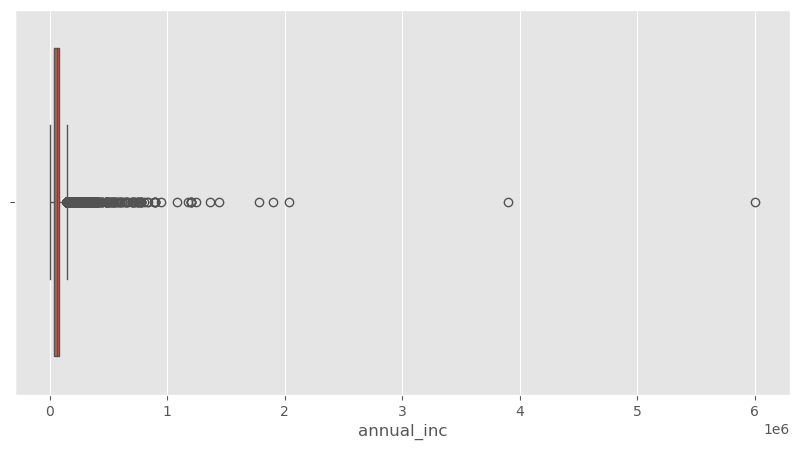

In [58]:
# Drawing Boxplot for Annual Income
plt.figure(figsize=(10,5))
with plt.style.context('ggplot'):
  sns.boxplot(df_loan_data.annual_inc,orient='h')

In [59]:
df_loan_data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [60]:
annual_income_quantile= df_loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
annual_income_quantile

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [61]:
# Removing Outliers from annual income i.e. Quantile 0.95
df_loan_data=df_loan_data[df_loan_data["annual_inc"]< df_loan_data["annual_inc"].quantile(0.95)]

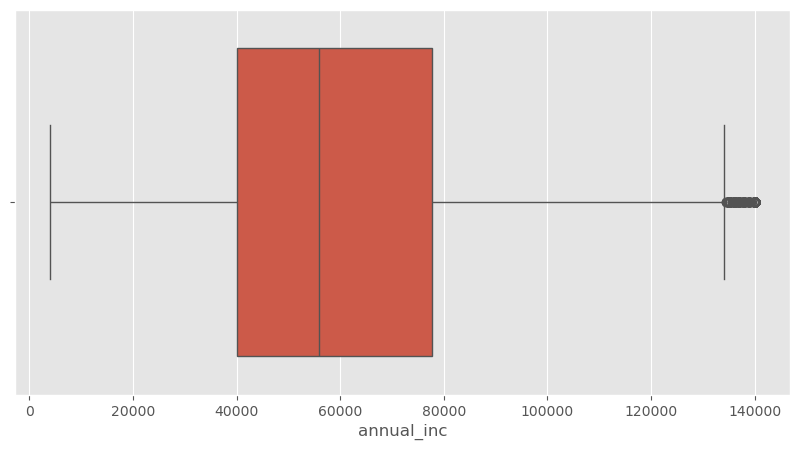

In [62]:
# Drawing Boxplot for Annual Income
plt.figure(figsize=(10,5))
with plt.style.context('ggplot'):
  sns.boxplot(df_loan_data.annual_inc,orient='h')

In [63]:
df_loan_data.shape

(36642, 56)

##### <span style='color:RED'>Observation 2.1.4: The outliers for Annual Income is removed and record count for loan data is 36642

### 2.2 Univariate Analysis

#### 2.2.1 Derive Data for Univariate Analysis

In [67]:
# Assigning new variable for Univariate analysis
df_loan_data_uni=df_loan_data

In [68]:
df_loan_data_uni['issue_d'].head(5)

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [69]:
# Extract Month and year from Issued Date
df_loan_data_uni['issue_month']=df_loan_data_uni['issue_d'].apply(lambda x: str.split(x,"-")[0])

In [70]:
df_loan_data_uni['issue_month'].head()

0    Dec
1    Dec
2    Dec
3    Dec
5    Dec
Name: issue_month, dtype: object

In [71]:
df_loan_data_uni['issue_year']=df_loan_data_uni['issue_d'].apply(lambda x: ('20'+str.split(x,"-")[1]))

In [72]:
df_loan_data_uni['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_year, dtype: object

#### 2.2.3 Univariate Analysis

#### <span style='color:blue'> Analysis 1 : Loan Amount Distribution

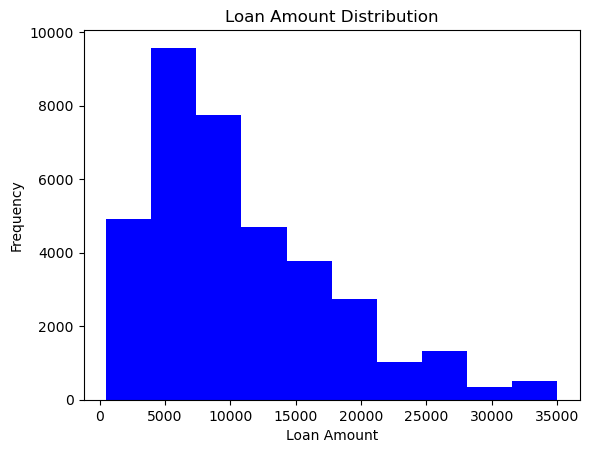

In [75]:
# title
plt.title('Loan Amount Distribution')

# xlabel
plt.xlabel('Loan Amount')

# ylabel
plt.ylabel('Frequency')

# plot histogram
plt.hist(df_loan_data_uni['loan_amnt'], bins=10, color='blue');

##### <span style='color:RED'>Observation 2.2.3.1: Higher number of loan application are observed for lower loan amounts in the range of 5000-10000 USD. There is further drop in applications seeking loans for higher amounts</span>

#### <span style='color:blue'> Analysis 2 : Loan Purposes

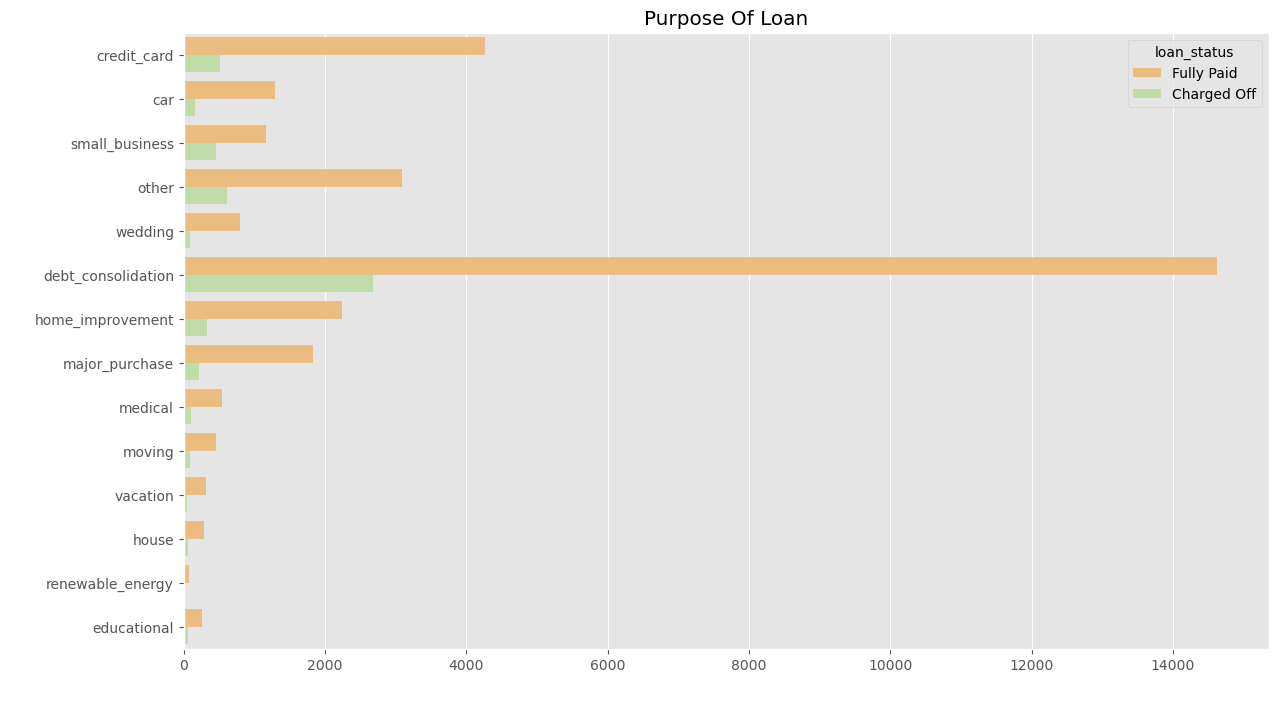

In [78]:
plt.figure(figsize=(14,8),facecolor='w')
with plt.style.context('ggplot'):
  ax=sns.countplot(y="purpose",data=df_loan_data_uni,hue='loan_status',palette='Spectral',color='white',)
  ax.set(title='Purpose Of Loan')
  ax.set_ylabel('Purpose Of Loan',fontsize=14,color='w')
  ax.set_xlabel('Count of Loan Application',fontsize=16,color='w')
  plt.show()

##### <span style='color:RED'>Observation 2.2.3.2: Higher number of loan application are observed for debt consolidation. The defaulters are also higher in this category</span><BR>

#### <span style='color:blue'> Analysis 3 : Loan Charged Off based on Issuance month and year

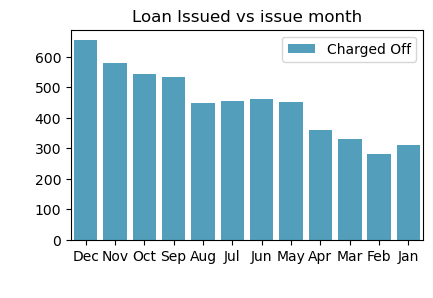

In [81]:
data1=df_loan_data_uni[df_loan_data_uni['loan_status']=='Charged Off']
plt.figure(figsize=(10,6),facecolor='w')
plt.subplot(2,2,1)
ax1 = sns.countplot(x='issue_month',data=data1,hue='loan_status',palette='GnBu_d')
ax1.set(title='Loan Issued vs issue month')
ax1.set_xlabel('issue month',fontsize=14,color = 'w')
ax1.set_ylabel('Loan Issued',fontsize=14,color = 'w')      
ax1.legend(bbox_to_anchor=(1, 1))
plt.show()


##### <span style='color:RED'>Observation 2.2.3.3: There is a higher charge off observed in applications received in the month of December</span><BR>

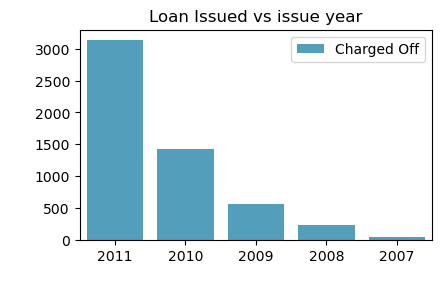

In [83]:
plt.figure(figsize=(10,6),facecolor='w')
plt.subplot(2,2,2)
ax2 = sns.countplot(x='issue_year', data=df_loan_data_uni[df_loan_data_uni['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax2.set(title='Loan Issued vs issue year')
ax2.set_xlabel('issue year',fontsize=14,color = 'w')
ax2.set_ylabel('Loan Issued',fontsize=14,color = 'w')      
ax2.legend(bbox_to_anchor=(1, 1))
plt.show()

##### <span style='color:RED'>Observation 2.2.3.4: Number of loan applications have increased sincethe year 2007. The application have alomost doubled in 2011 as compared to 2010. This indicates a healthy loan market for the bank which is attracting these applications</span><BR>

#### Analysis 4: Loan Interest Distribution

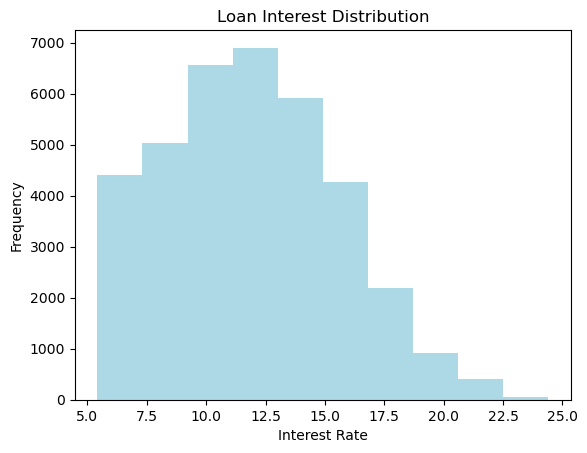

In [86]:
# title
plt.title('Loan Interest Distribution')

# xlabel
plt.xlabel('Interest Rate')

# ylabel
plt.ylabel('Frequency')

# plot histogram
plt.hist(df_loan_data_uni['int_rate'], bins=10, color='lightblue');

##### <span style='color:RED'>Observation 2.2.3.5: There are more applicants with interest rate of 10 to 15%</span><BR>

#### Analysis 5: Homeownership distribution | Unordered Categorical

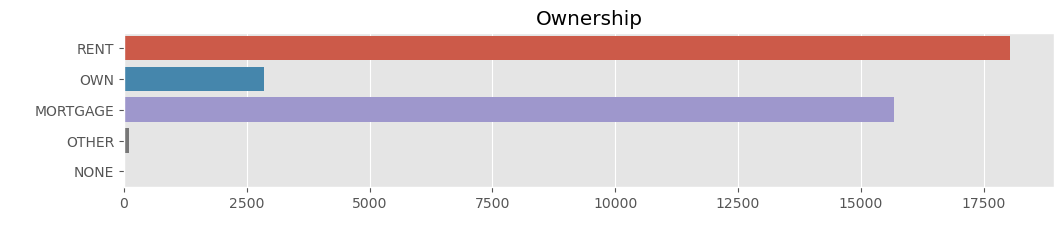

In [89]:
plt.figure(figsize=(12,2),facecolor='w')
with plt.style.context('ggplot'):
  ax=sns.countplot(y="home_ownership",data=df_loan_data_uni,hue='home_ownership')
  ax.set(title='Ownership')
  ax.set_ylabel('Ownership',fontsize=14,color='w')
  ax.set_xlabel('Count of Loan Application',fontsize=16,color='w')
  sns.dark_palette("#69d", reverse=True, as_cmap=True)
  plt.show()

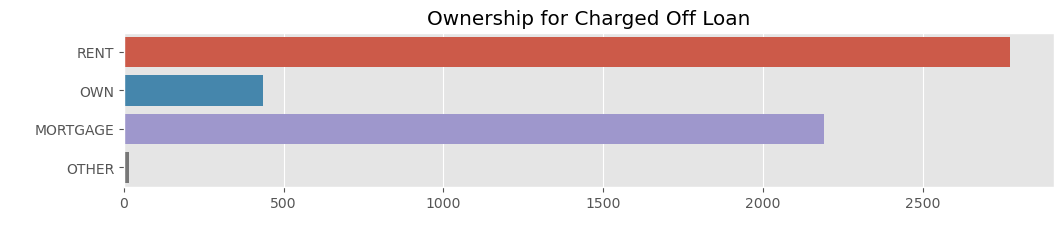

In [90]:
data1=df_loan_data_uni[df_loan_data_uni['loan_status']=='Charged Off']

plt.figure(figsize=(12,2),facecolor='w')
with plt.style.context('ggplot'):
  ax=sns.countplot(y="home_ownership",data=data1,hue='home_ownership')
  ax.set(title='Ownership for Charged Off Loan')
  ax.set_ylabel('Ownership',fontsize=14,color='w')
  ax.set_xlabel('Count of Loan Application',fontsize=16,color='w')
  plt.show()

<span style='color:RED'>
Observation 2.2.3.6: 
<LI>There are more applicants who are residing in rental properties followed by those who have mortgaged their property</LI>
<LI>There defaulters also show a similar pattern</LI>
</span><BR>

#### Analysis 6: Term Requested | Ordered Categorical

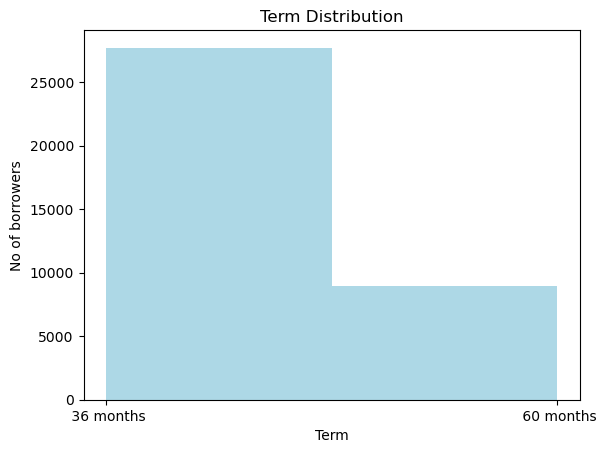

In [93]:
# title
plt.title('Term Distribution')

# xlabel
plt.xlabel('Term',loc='center')

# ylabel
plt.ylabel('No of borrowers')

# plot histogram
plt.hist(df_loan_data_uni['term'], bins=2, color='lightblue',orientation='vertical');

<span style='color:RED'>
Observation 2.2.3.7: 
<LI>There are more applicants seeking a loan for a tenure of 36 months</LI>
</span><BR>

#### Analysis 7: Employment Grade wise defaulters

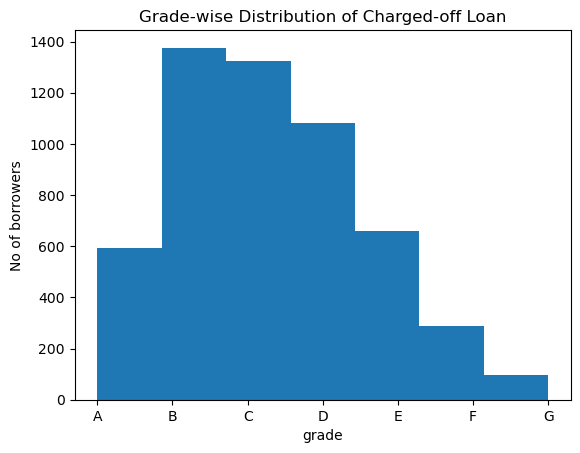

In [96]:
data1=df_loan_data_uni[df_loan_data_uni['loan_status']=='Charged Off']

# title
plt.title('Grade-wise Distribution of Charged-off Loan')

# xlabel
plt.xlabel('grade',loc='center')

# ylabel
plt.ylabel('No of borrowers')

data1=data1.sort_values(by=('grade'), ascending=True)

# plot histogram
plt.hist(data1['grade'], bins=7);

<span style='color:RED'>
Observation 2.2.3.8: 
<LI>There are more defaulters in the B,C and D grades than the other grades</LI>
</span><BR>

#### Analysis 8: Univariate Analysis - Unordered Categorical Variables - Loan Status



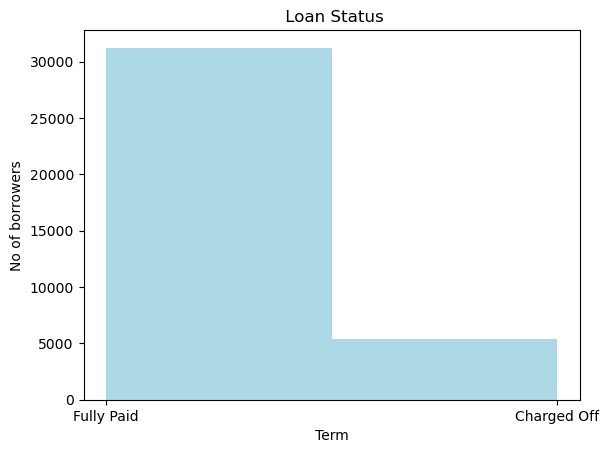

In [99]:
# title
plt.title(' Loan Status')

# xlabel
plt.xlabel('Term',loc='center')

# ylabel
plt.ylabel('No of borrowers')

# plot histogram
plt.hist(df_loan_data_uni['loan_status'], bins=2, color='lightblue',orientation='vertical');

In [100]:
df_loan_data_uni['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     85.219147
Charged Off    14.780853
Name: proportion, dtype: float64

<span style='color:RED'>
Observation 2.2.3.9: 
<LI>About 14.7% of the loan applications tend to default and their loans are charged-off</LI>
</span><BR>

#### Analysis 9: Univariate Analysis - Ordered Categorical Variables - Employement Length of charged off loans¶

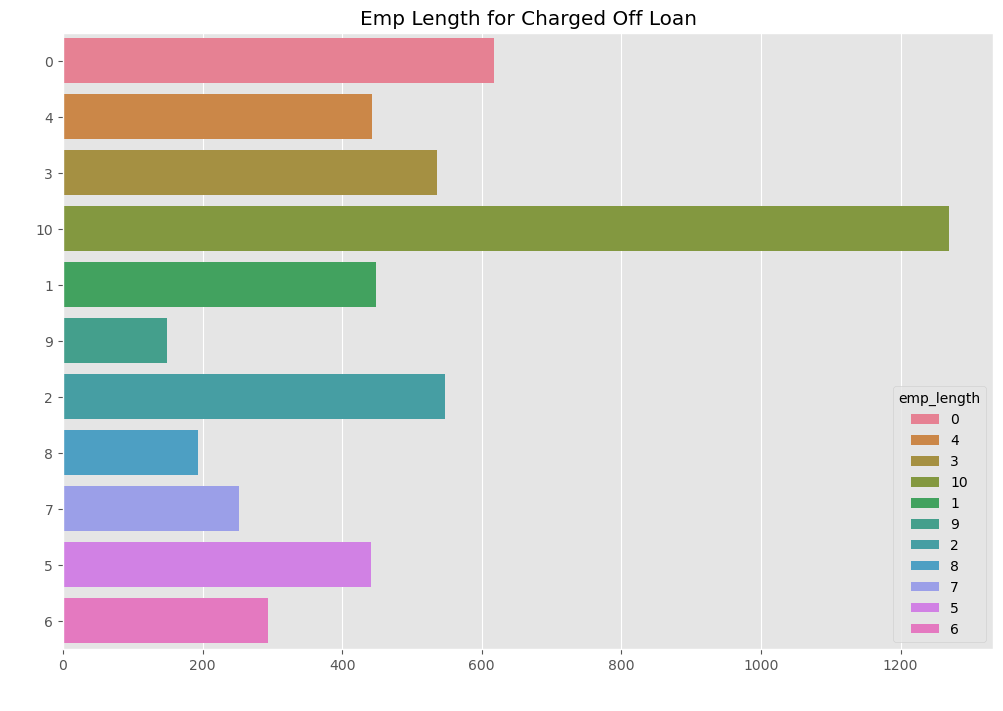

In [103]:
data1=df_loan_data_uni[df_loan_data_uni['loan_status']=='Charged Off']
plt.figure(figsize=(12,8),facecolor='w')
with plt.style.context('ggplot'):
  ax=sns.countplot(y="emp_length",data=data1,hue='emp_length')
  ax.set(title='Emp Length for Charged Off Loan')
  ax.set_ylabel('emp_length',fontsize=14,color='w')
  ax.set_xlabel('Count of Loan Application',fontsize=16,color='w')
  plt.show()

<span style='color:RED'>
Observation 2.2.3.10: 
<LI>There is a high number of defaulters with more than 10 years of employment history. The bank needs to further scrutinise these application for authenticity</LI>
</span><BR

### 2.3 Bivariate Analysis

#### 2.3.1 Derive Data for Bivariate Analysis

In [107]:
df_loan_data_bi=df_loan_data

In [108]:
df_loan_data_bi['loan_amnt'].describe()

count    36642.000000
mean     10681.045658
std       7047.619569
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#systax of pandas cut <BR>
#pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)[source]

In [110]:
#Creating categories for loan amounts
df_loan_data_bi['loan_amnt_cat']=pd.cut(df_loan_data_bi['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

In [111]:
df_loan_data_bi['dti'].describe()

count    36642.000000
mean        13.447256
std          6.661561
min          0.000000
25%          8.350000
50%         13.580000
75%         18.717500
max         29.990000
Name: dti, dtype: float64

In [112]:
#Creating dti into buckets for analysis
df_loan_data_bi['dti_categories']=pd.cut(df_loan_data_bi['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-13.5','13.5-20','25+'])

In [113]:
df_loan_data_bi['annual_inc'].describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

In [114]:
#Creating categories for annual incomes
df_loan_data_bi['annual_inc_cat']=pd.cut(df_loan_data_bi['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

In [115]:
df_loan_data_bi['int_rate'].describe()

count    36642.000000
mean        11.887884
std          3.667161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [116]:
#Creating categories for interest rates
df_loan_data_bi['interest_rate_cat']=pd.cut(df_loan_data_bi['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','13-16','16+'])

### 2.3.2 Bivariate analysis on continuous variables

In [118]:
df_loan_data_bi.describe().columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [119]:
#Remove further unwannted columns
column_to_drop=["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
df_loan_data_bi.drop(labels=column_to_drop,axis=1,inplace=True)

In [120]:
# Arrive at columns for correlation. This list was arrived at after mutiple iterations

df_loan_corr= df_loan_data_bi[['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
        'int_rate','annual_inc','dti','revol_bal', 'total_pymnt']]

In [121]:
loan_corr=df_loan_corr.corr(method='pearson', min_periods=1, numeric_only=False)
loan_corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,revol_bal,total_pymnt
loan_amnt,1.000000,0.981940,0.936901,0.291145,0.403358,0.090237,0.312939,0.876601
funded_amnt,0.981940,1.000000,0.954829,0.296134,0.399203,0.089438,0.304872,0.893239
funded_amnt_inv,0.936901,0.954829,1.000000,0.288743,0.382540,0.097037,0.285374,0.868781
int_rate,0.291145,0.296134,0.288743,1.000000,0.053952,0.111587,0.080722,0.279973
annual_inc,0.403358,0.399203,0.382540,0.053952,1.000000,-0.072526,0.397680,0.382223
dti,0.090237,0.089438,0.097037,0.111587,-0.072526,1.000000,0.270878,0.086089
revol_bal,0.312939,0.304872,0.285374,0.080722,0.397680,0.270878,1.000000,0.283070
total_pymnt,0.876601,0.893239,0.868781,0.279973,0.382223,0.086089,0.283070,1.000000


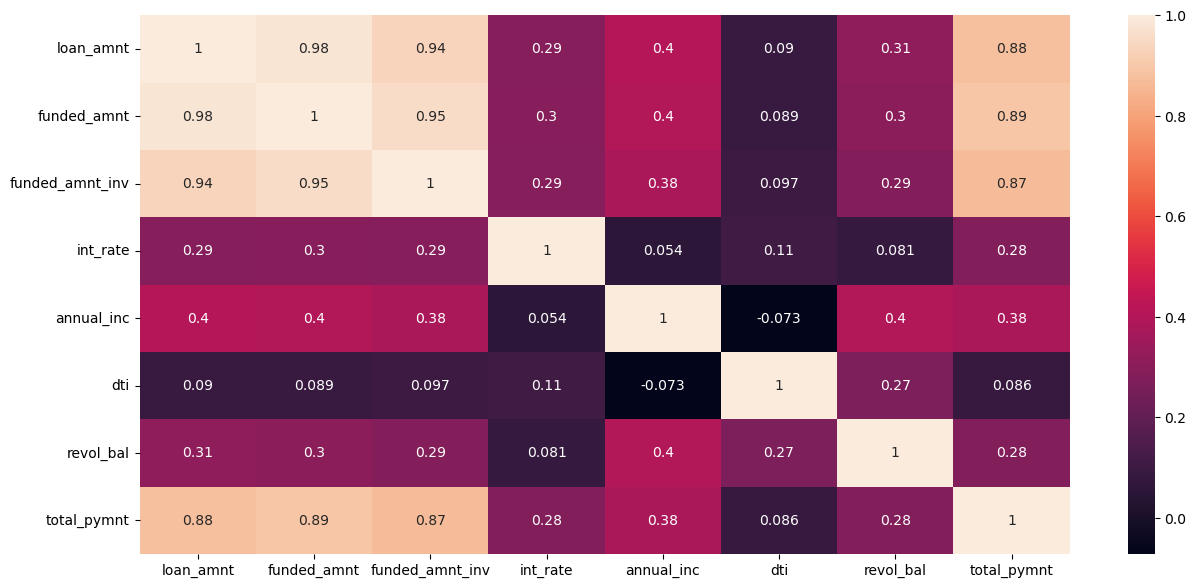

In [122]:
plt.figure(figsize=(15,7))
sns.heatmap(loan_corr,annot=True)
plt.show()

#### Loan Amount,Funding Amount and Investor Amount have strong postive correlation

#### Annual Income to Debt-To-Income Ratio are negatively correlated

#### Positive correlation between annual income and funded amount which implies that applicants with high income gets high funded amount

#### There is a positive correlation between annual income and total payment  


### 2.3.3 Bivariate Analysis on key indicators
### - Purpose vs Loan Amount
### - Purpose vs Interest Rate
### - Loan Amount vs Interest Rate
### - dti vs Interest Rate

In [125]:
# Shape of the dataframe used for below analysis
df_loan_data_bi.shape 

(36642, 57)

In [126]:
#### Purpose vs Interest Rate

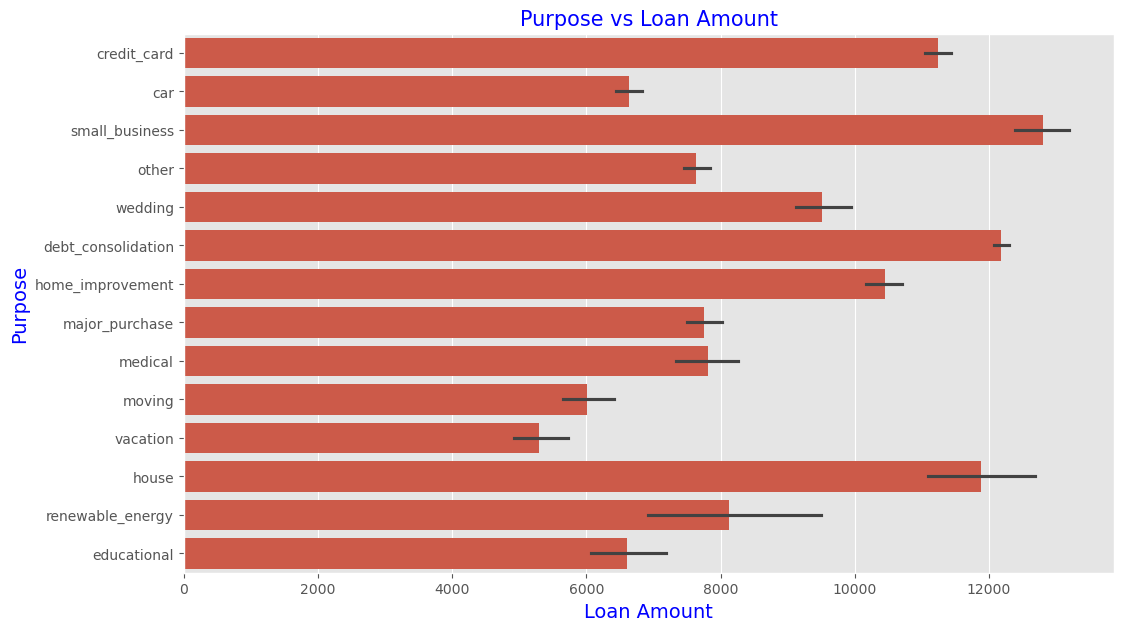

In [127]:
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='w')
  ax1.set_title('Purpose vs Loan Amount',fontsize=15,color='b')
  ax1=sns.barplot(x='loan_amnt', y='purpose', data=df_loan_data_bi)
  ax1.set_xlabel('Loan Amount',fontsize=14,color='b')
  ax1.set_ylabel('Purpose',fontsize=14,color = 'b')
  plt.show()
    

##### <span style='color:RED'>Observation 2.3.3.1. Small business, Debt Consolidation and House were the 3 top purpose where loan amount requested was the highest

#### Purpose vs Interest Rate

In [130]:
df_loan_data_bi[['int_rate','purpose']].groupby('purpose').agg({'int_rate':'mean'}).sort_values(by='int_rate', ascending=False)

,int_rate
purpose,
small_business,12.876802
debt_consolidation,12.344373
house,12.074527
wedding,11.743117
other,11.664694
educational,11.627115
credit_card,11.572319
moving,11.486891
medical,11.456000


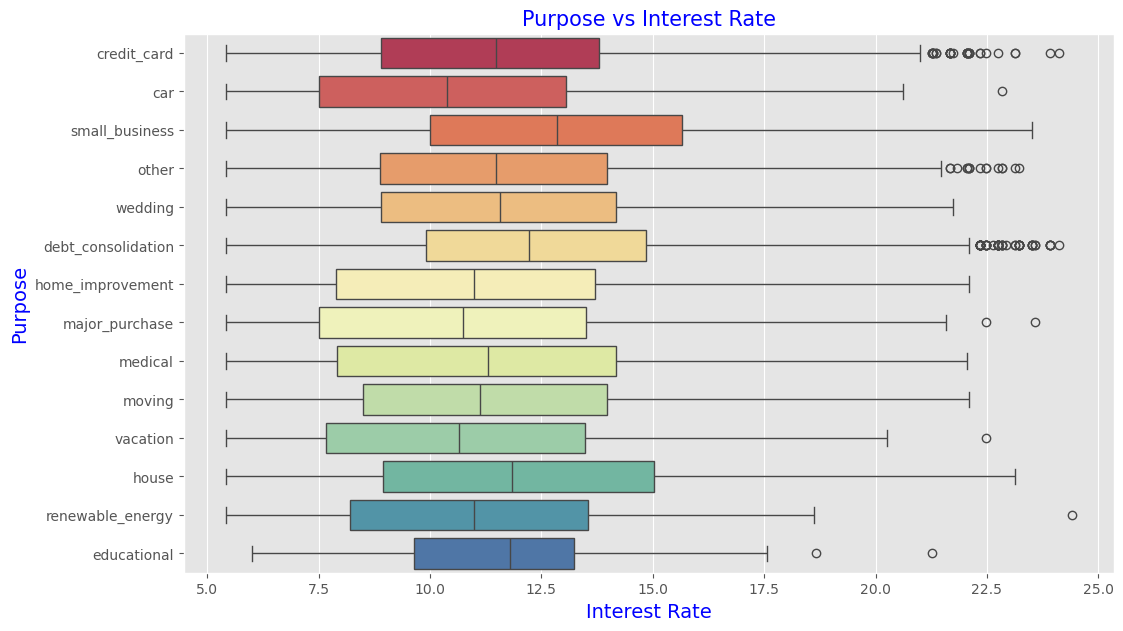

In [131]:
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='w')
  ax1.set_title('Purpose vs Interest Rate',fontsize=15,color='b')
  ax1=sns.boxplot(x='int_rate', y='purpose', data=df_loan_data_bi,palette='Spectral')
  ax1.set_xlabel('Interest Rate',fontsize=14,color='b')
  ax1.set_ylabel('Purpose',fontsize=14,color = 'b')
  plt.show()

##### <span style='color:RED'>Observation 2.3.3.2 <BR> <BR> <LI> Small business had the highest average interest rates followed by debt consolidation<BR><BR> <LI> The least average interest was for buying a Car

#### Loan Amount vs Interest Rate

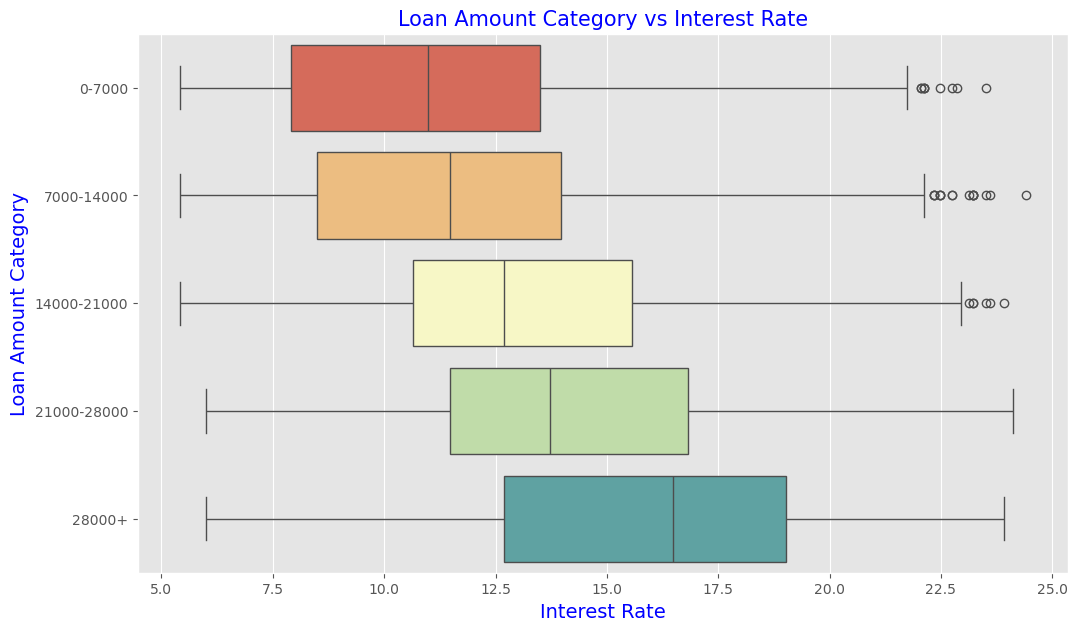

In [134]:
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='w')
  ax1.set_title('Loan Amount Category vs Interest Rate',fontsize=15,color='b')
  ax1=sns.boxplot(x='int_rate', y='loan_amnt_cat', data=df_loan_data_bi,palette='Spectral')
  ax1.set_xlabel('Interest Rate',fontsize=14,color='b')
  ax1.set_ylabel('Loan Amount Category',fontsize=14,color = 'b')
  plt.show()

##### <span style='color:RED'> Observation 2.3.3.3 <BR> <BR><LI> Small business had the highest average interest rates followed by debt consolidation<BR> <LI> The least average interest was for buying a Car
</span>

#### dti vs Interest Rate

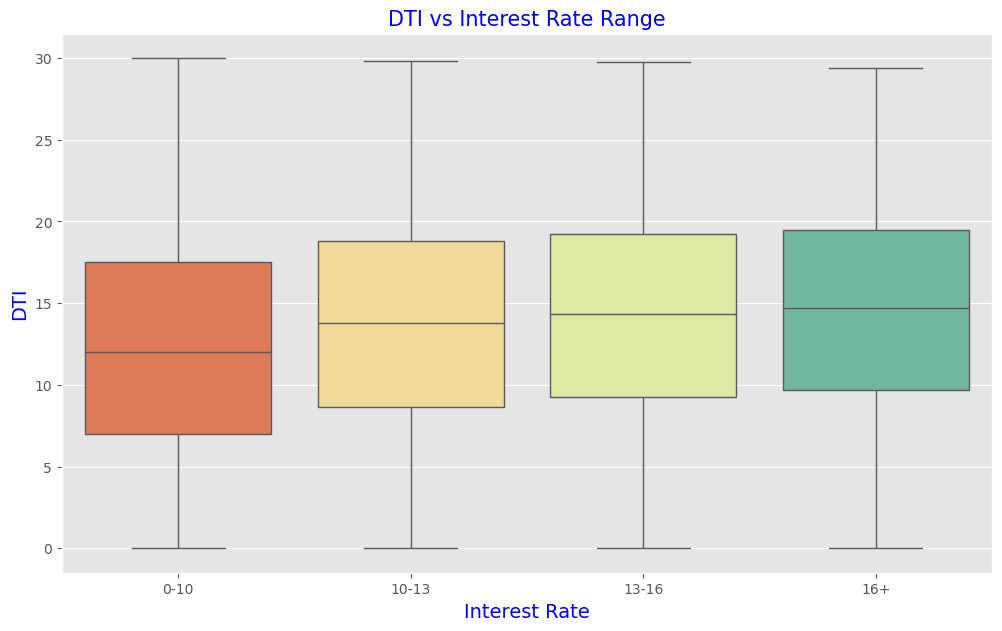

In [193]:
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='w')
  ax1.set_title('DTI vs Interest Rate Range',fontsize=15,color='b')
  ax1=sns.boxplot(x='interest_rate_cat', y='dti', data=df_loan_data_bi,palette='Spectral')
  ax1.set_xlabel('Interest Rate',fontsize=14,color='b')
  ax1.set_ylabel('DTI',fontsize=14,color = 'b')
  plt.show()

##### <span style='color:RED'>Observation 2.3.3.4 <BR> <BR> <LI> Average Interests rates are higher for higher DTI. This is true since higher DTI has a higher possibility of default

In [139]:
##### Grade vs Interest Rate

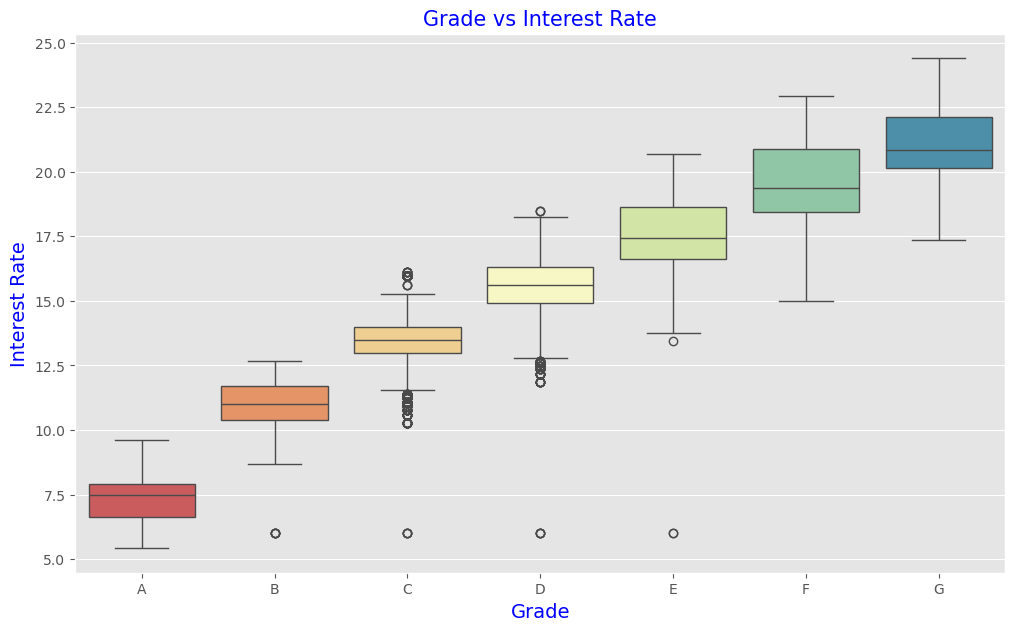

In [140]:
df=df_loan_data_bi.sort_values(by='grade')
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='w')
  ax1.set_title('Grade vs Interest Rate',fontsize=15,color='b')
  ax1=sns.boxplot(y='int_rate', x='grade', data=df,palette='Spectral')
  ax1.set_xlabel('Grade',fontsize=14,color = 'b')
  ax1.set_ylabel('Interest Rate',fontsize=14,color='b')
  plt.show()

##### <span style='color:RED'>Observation 2.3.3.5<BR> <BR> <LI> Average Interests rates are higher for lower grades. 

### 2.3.4 Bivariate Analysis of Charged-Off Loans

#### Since the purpose of this exercise is to help the bank identify high risk loan application we will focus on Charged Off loans to draw insights through bivariate analysis. It was analysed earlier in univariate analysis that around 14% of the loan application had a charged-off status

In [144]:
# Dataset for analysing Charged off loans
df_charged_off = df_loan_data_bi[df_loan_data_uni['loan_status']=='Charged Off']

In [145]:
df_charged_off.shape

(5416, 57)

####  <span style='color:BLUE'>Charge Off based on annual income range </span>

In [147]:
annual_income_range_v_chargeoff = df_loan_data_bi.groupby(['annual_inc_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_income_range_v_chargeoff['Total'] = annual_income_range_v_chargeoff['Charged Off'] + annual_income_range_v_chargeoff['Fully Paid'] 
annual_income_range_v_chargeoff['Chargedoff_Percent'] = round((annual_income_range_v_chargeoff['Charged Off'] / annual_income_range_v_chargeoff['Total'])*100)
annual_income_range_v_chargeoff.sort_values('Chargedoff_Percent', ascending=False)

loan_status,annual_inc_cat,Charged Off,Fully Paid,Total,Chargedoff_Percent
0,0-20000,237,943,1180,20.0
1,20000-40000,1514,7004,8518,18.0
2,40000-60000,1729,9534,11263,15.0
3,60000-80000,1024,6597,7621,13.0
4,80000+,912,7148,8060,11.0


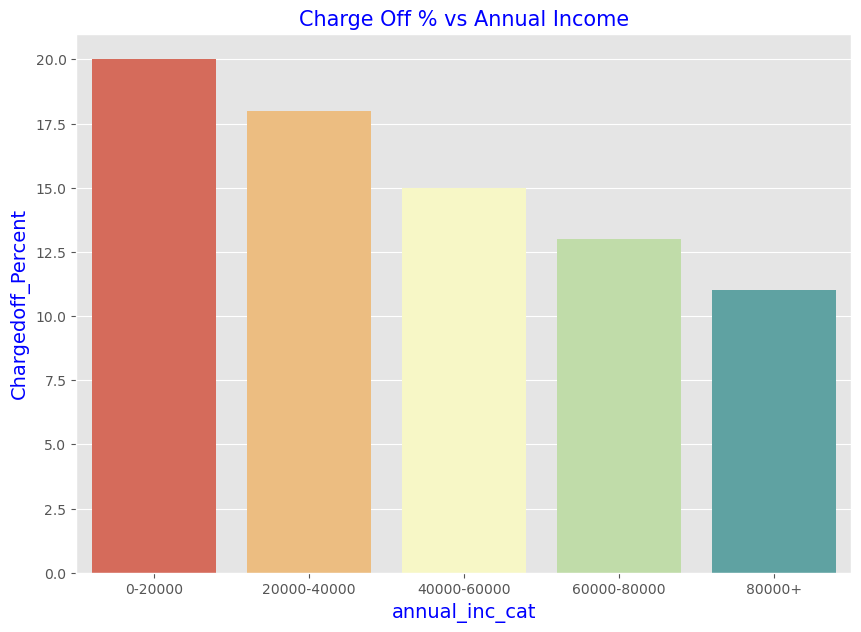

In [148]:
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='w')
  ax1.set_title('Charge Off % vs Annual Income',fontsize=15,color='b')
  ax1=sns.barplot(x='annual_inc_cat', y='Chargedoff_Percent', data=annual_income_range_v_chargeoff,palette='Spectral')
  ax1.set_xlabel('annual_inc_cat',fontsize=14,color='b')
  ax1.set_ylabel('Chargedoff_Percent',fontsize=14,color = 'b')
  plt.show()

##### <span style='color:RED'>Observation 2.3.4.1<BR> <BR> <LI> There is higher possiblity of charge-off by applicants with lower annual income range of less than 20,000 <BR><BR> <LI> There is a decreasing trans shown at higher annual income categories

####  <span style='color:BLUE'> Charged-Off% versus Purpose of Loan </span>


In [170]:
purpose_v_chargeoff = df_loan_data_bi.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_v_chargeoff['Total'] = purpose_v_chargeoff['Charged Off'] + purpose_v_chargeoff['Fully Paid'] 
purpose_v_chargeoff['Chargedoff_Percent'] = round((purpose_v_chargeoff['Charged Off'] / purpose_v_chargeoff['Total'])*100)
purpose_v_chargeoff.sort_values('Chargedoff_Percent', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Percent
11,small_business,454,1169,1623,28.0
10,renewable_energy,18,77,95,19.0
3,educational,54,258,312,17.0
5,house,55,283,338,16.0
7,medical,104,536,640,16.0
8,moving,90,460,550,16.0
9,other,605,3091,3696,16.0
2,debt_consolidation,2675,14626,17301,15.0
12,vacation,52,313,365,14.0
4,home_improvement,322,2233,2555,13.0


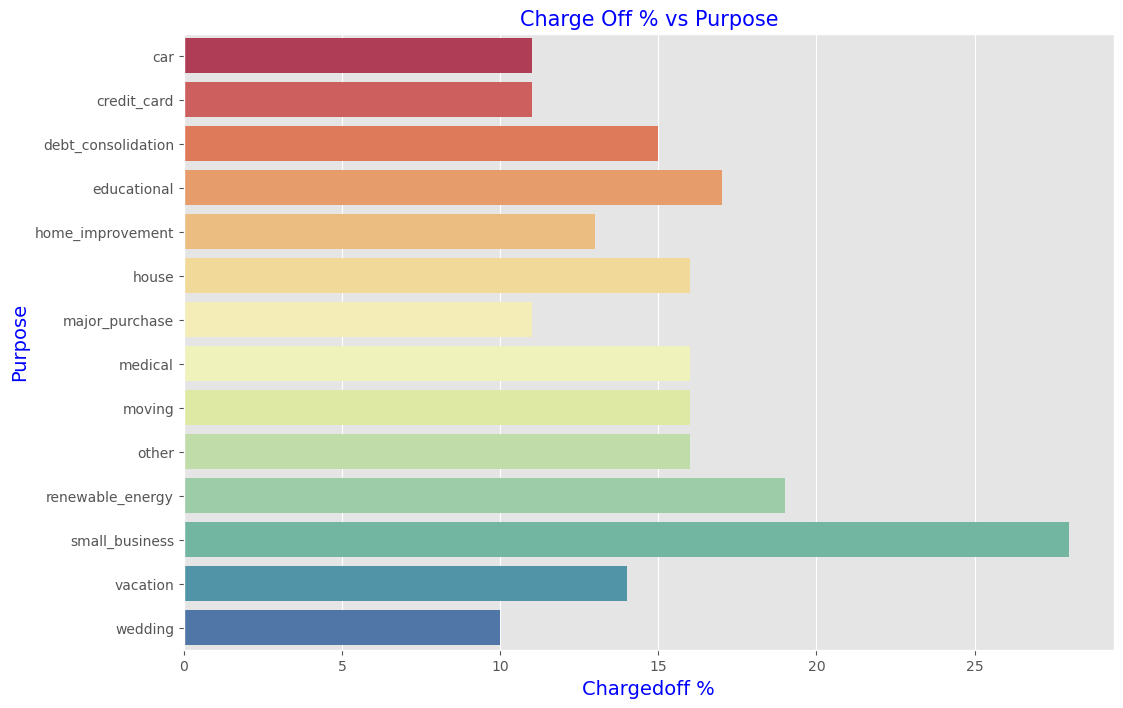

In [172]:
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
  ax1.set_title('Charge Off % vs Purpose',fontsize=15,color='b')
  ax1=sns.barplot(x='Chargedoff_Percent',y='purpose', data=purpose_v_chargeoff,palette='Spectral')
  ax1.set_xlabel('Chargedoff %',fontsize=14,color = 'b')
  ax1.set_ylabel('Purpose',fontsize=14,color='b')
  plt.show()

##### <span style='color:RED'>Observation 2.3.4.2<BR> <BR> <LI> There is higher possiblity of charge-off by applicants seeking loan for Small Business <BR><BR> <LI>  Renewable Energey and Educational loans are the next in terms of charge-off

####  <span style='color:BLUE'> Grade against Charged Off Proportion </span>

In [ ]:
grade_v_chargeoff = df_loan_data_bi.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_v_chargeoff['Total'] = grade_v_chargeoff['Charged Off'] + grade_v_chargeoff['Fully Paid'] 
grade_v_chargeoff['Chargedoff_Percent'] = round((grade_v_chargeoff['Charged Off'] / grade_v_chargeoff['Total'])*100)
grade_v_chargeoff.sort_values('grade', ascending=True)

In [ ]:
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(12, 5),facecolor='w')
  ax1.set_title('Charge Off % vs Grade',fontsize=15,color='b')
  ax1=sns.barplot(x='Chargedoff_Percent', y='grade', data=grade_v_chargeoff,palette='Spectral')
  ax1.set_xlabel('Chargedoff %',fontsize=14,color = 'b')
  ax1.set_ylabel('Grade',fontsize=14,color='b')
  plt.show()

##### <span style='color:RED'>Observation 2.3.4.3<BR> <BR> <LI> There is higher possiblity of charge-off by applicants with lower grade ("Grade G")<BR><BR>

####  <span style='color:BLUE'> Employment length vs Charged Off Percentage </span>

In [178]:
emplength_v_chargeoff = df_loan_data_bi.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplength_v_chargeoff['emp_length']= emplength_v_chargeoff['emp_length'].astype('int64')
emplength_v_chargeoff['Total'] = emplength_v_chargeoff['Charged Off'] + emplength_v_chargeoff['Fully Paid'] 
emplength_v_chargeoff['Chargedoff_Percent'] = round((emplength_v_chargeoff['Charged Off'] / emplength_v_chargeoff['Total'])*100)
emplength_v_chargeoff.sort_values('emp_length', ascending=True)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Percent
0,0,617,3710,4327,14.0
1,1,449,2594,3043,15.0
3,2,547,3554,4101,13.0
4,3,536,3287,3823,14.0
5,4,443,2754,3197,14.0
6,5,441,2603,3044,14.0
7,6,294,1779,2073,14.0
8,7,252,1391,1643,15.0
9,8,194,1147,1341,14.0
10,9,149,1003,1152,13.0


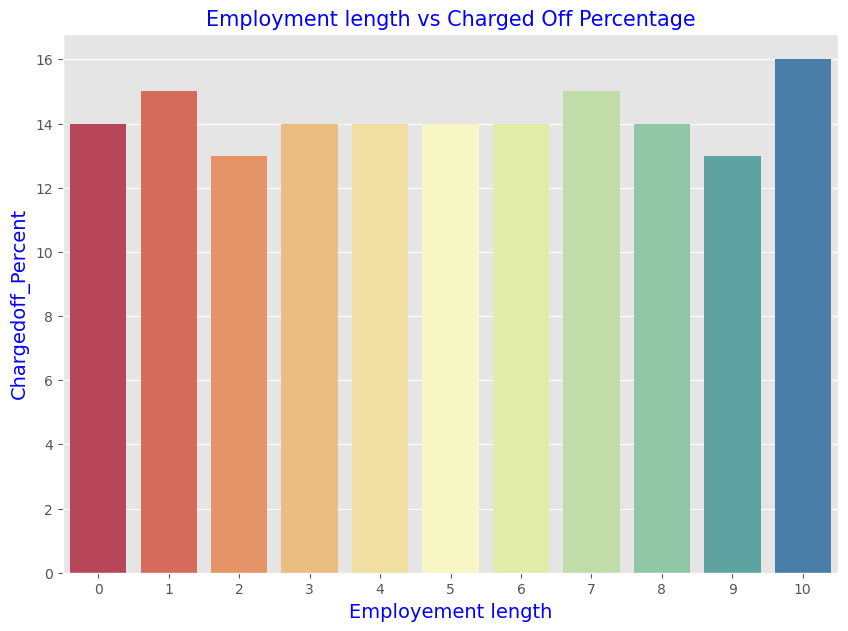

In [180]:
with plt.style.context('ggplot'):
  fig, ax1 = plt.subplots(figsize=(10, 7),facecolor='w')
  ax1.set_title('Employment length vs Charged Off Percentage',fontsize=15,color='b')
  ax1=sns.barplot(x='emp_length', y='Chargedoff_Percent', data=emplength_v_chargeoff,palette='Spectral')
  ax1.set_xlabel('Employement length',fontsize=14,color='b')
  ax1.set_ylabel('Chargedoff_Percent',fontsize=14,color = 'b')
  plt.show()

##### <span style='color:RED'>Observation 2.3.4.4<BR> <BR> <LI> While it was observed in univariate analysis that the applications with >10 year of employment duration had higher charge-off risk, within each duration of employment the charge of percentage is almost similar.

####  <span style='color:BLUE'> Verification status against Charged Off Percentage </span>

In [174]:
verstatus_v_chargeoff = df_loan_data_bi.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verstatus_v_chargeoff['Total'] = verstatus_v_chargeoff['Charged Off'] + verstatus_v_chargeoff['Fully Paid'] 
verstatus_v_chargeoff['Chargedoff_Percent'] = round((verstatus_v_chargeoff['Charged Off'] / verstatus_v_chargeoff['Total'])*100)
verstatus_v_chargeoff.sort_values('verification_status', ascending=True)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Percent
0,Not Verified,2095,14183,16278,13.0
1,Source Verified,1373,7777,9150,15.0
2,Verified,1948,9266,11214,17.0


##### <span style='color:RED'>Observation 2.3.4.5<BR> <BR> <LI> There is a higher possiblity of charge-off when the loan applications are fully verified. Though not very conclusive the bank needs to strengthen the underwriting process of loan applications

#####  <span style='color:BLUE'> State wise ChargedOff Percentage</span>

In [182]:
state_v_chargeoff = df_loan_data_bi.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_v_chargeoff['Total'] = state_v_chargeoff['Charged Off'] + state_v_chargeoff['Fully Paid'] 
state_v_chargeoff['Chargedoff_Percent'] = round((state_v_chargeoff['Charged Off'] / state_v_chargeoff['Total'])*100)
state_v_chargeoff.sort_values('Chargedoff_Percent', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Percent
28,NE,3.0,2.0,5.0,60.0
32,NV,103.0,354.0,457.0,23.0
13,ID,1.0,4.0,5.0,20.0
40,SD,12.0,50.0,62.0,19.0
0,AK,13.0,58.0,71.0,18.0
9,FL,485.0,2167.0,2652.0,18.0
11,HI,28.0,132.0,160.0,18.0
31,NM,30.0,147.0,177.0,17.0
24,MO,111.0,536.0,647.0,17.0
20,MD,156.0,810.0,966.0,16.0


In [186]:
state_v_chargeoff[state_v_chargeoff['Total']>100].sort_values('Chargedoff_Percent', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Percent
32,NV,103.0,354.0,457.0,23.0
11,HI,28.0,132.0,160.0,18.0
9,FL,485.0,2167.0,2652.0,18.0
24,MO,111.0,536.0,647.0,17.0
31,NM,30.0,147.0,177.0,17.0
36,OR,70.0,358.0,428.0,16.0
30,NJ,269.0,1402.0,1671.0,16.0
29,NH,25.0,132.0,157.0,16.0
27,NC,113.0,606.0,719.0,16.0
20,MD,156.0,810.0,966.0,16.0


##### <span style='color:RED'>Observation 2.3.4.6<BR><BR><LI>Though NE state shows a high charge-off % the number of applications were not high to be considered for any conclusions</LI><LI>Upon filtering for states having more than 100 applications, NV seems to have a higher risk of defaulting</LI>

#####  <span style='color:BLUE'>Public Records of bankruptcies against ChargedOff Percentage</span>


In [184]:
pubrec_v_chargeoff = df_loan_data_bi.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pubrec_v_chargeoff['Total'] = pubrec_v_chargeoff['Charged Off'] + pubrec_v_chargeoff['Fully Paid'] 
pubrec_v_chargeoff['Chargedoff_Percent'] = round((pubrec_v_chargeoff['Charged Off'] / pubrec_v_chargeoff['Total'])*100)
pubrec_v_chargeoff.sort_values('pub_rec_bankruptcies', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Percent
2,2.0,2,3,5,40.0
1,1.0,361,1238,1599,23.0
0,0.0,4941,29439,34380,14.0


##### <span style='color:RED'>Observation 2.3.4.7<BR><LI>Those who already have public record of bankruptcies value 1, have charged off percentage which is  higher than those who have no public record of bankruptcies.</LI>

# --------------THE END----------------